In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pickle

In [3]:
ga_path = 'pickles/ga/'
kbga_path = 'pickles/kbga/'

In [4]:
ga_files = ['n_run_az_100fc.pkl', "n_run_az_ga_100fc_pt_avg.pkl"]
kbga_files = ['n_run_az_kbga_nokbps.pkl', 'n_run_az_kbga_es50_100.pkl', 'n_run_az_kbga_cmp.pkl', 'n_run_az_kbga_vp.pkl', 'n_run_az_kbga_es50_100_pt.pkl']

## GA Comparison

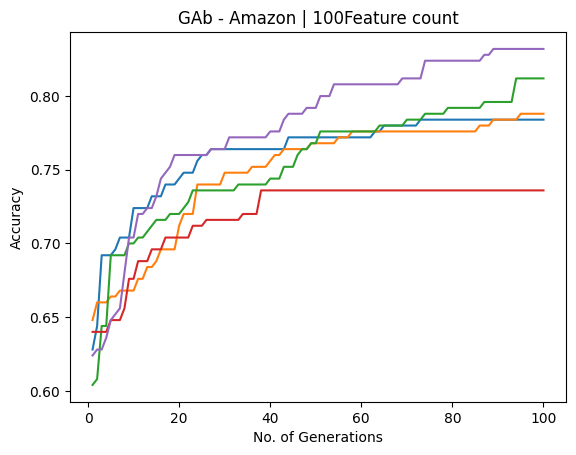

In [5]:
with open(ga_path+ga_files[0], 'rb') as gf:
    data = pickle.load(gf)
    x = range(1, 101)
    for n in data:
        y = n[1]    
        plt.plot(x, y)
    plt.title("GAb - Amazon | 100Feature count")
    plt.xlabel('No. of Generations')
    plt.ylabel('Accuracy')
    plt.show()

In [6]:
avg_acc_ga = np.array(data[0][1])
for i in data[1:]:
    avg_acc_ga += i[1]
avg_acc_ga = avg_acc_ga / 5

red is for 0.1 crossover probability
orange is for 0.2 crossover probability
yellow is for 0.3 crossover probability
blue is for 0.4 crossover probability
green is for 0.5 crossover probability
pink is for 0.6 crossover probability
brown is for 0.7 crossover probability
black is for 0.8 crossover probability
violet is for 0.9 crossover probability


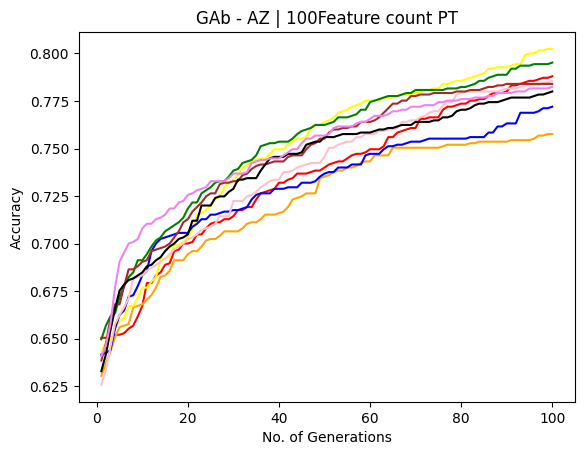

In [7]:
with open(ga_path+ga_files[1], 'rb') as gf:
    data = pickle.load(gf)
    clr = ["red", "orange", "yellow", "blue", "green", "pink", "brown", "black", "violet"]
    x = range(1, 101)
    for i in range(len(data[0])):
        y = data[0][i]
        plt.plot(x, y[0], color=clr[i])
        print(clr[i], "is for", y[1], "crossover probability")
    plt.title("GAb - AZ | 100Feature count PT")
    plt.xlabel('No. of Generations')
    plt.ylabel('Accuracy')
    plt.show()

## KBGA Comparison

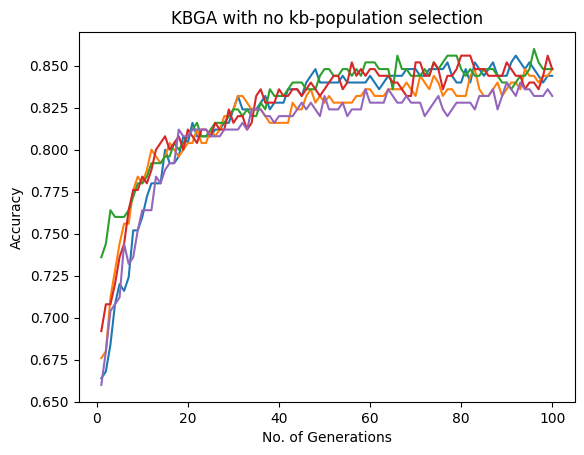

In [8]:
with open(kbga_path+kbga_files[0], 'rb') as gf:
    data = pickle.load(gf)
    x = range(1, 101)
    for n in data:
        y = n[1]    
        plt.plot(x, y)
    plt.title("KBGA with no kb-population selection")
    plt.xlabel('No. of Generations')
    plt.ylabel('Accuracy')
    plt.show()

In [9]:
avg_acc_nkb = np.array(data[0][1])
for i in data[1:]:
    avg_acc_nkb += i[1]
avg_acc_nkb = avg_acc_nkb / 5

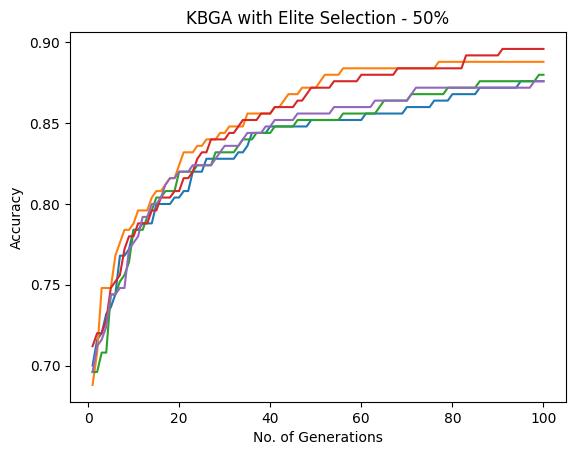

In [10]:
with open(kbga_path+kbga_files[1], 'rb') as gf:
    data = pickle.load(gf)
    x = range(1, 101)
    for n in data:
        y = n[1]    
        plt.plot(x, y)
    plt.title("KBGA with Elite Selection - 50%")
    plt.xlabel('No. of Generations')
    plt.ylabel('Accuracy')
    plt.show()

In [11]:
avg_acc_es = np.array(data[0][1])
for i in data[1:]:
    avg_acc_es += i[1]
avg_acc_es = avg_acc_es / 5

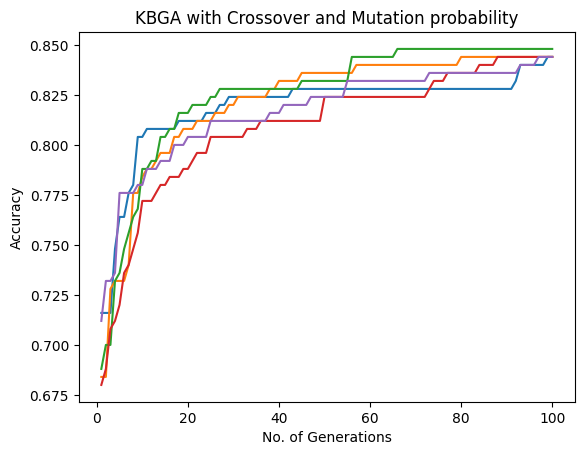

In [12]:
with open(kbga_path+kbga_files[2], 'rb') as gf:
    data = pickle.load(gf)
    x = range(1, 101)
    for n in data:
        y = n[1]    
        plt.plot(x, y)
    plt.title("KBGA with Crossover and Mutation probability")
    plt.xlabel('No. of Generations')
    plt.ylabel('Accuracy')
    plt.show()

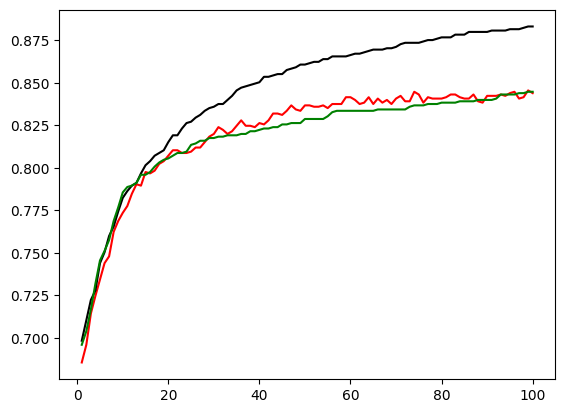

In [13]:
avg_acc_cmp = np.array(data[0][1])
for i in data[1:]:
    avg_acc_cmp += i[1]
avg_acc_cmp = avg_acc_cmp / 5
plt.plot(x, avg_acc_nkb, color="red")
plt.plot(x, avg_acc_es, color="black")
plt.plot(x, avg_acc_cmp, color='green')

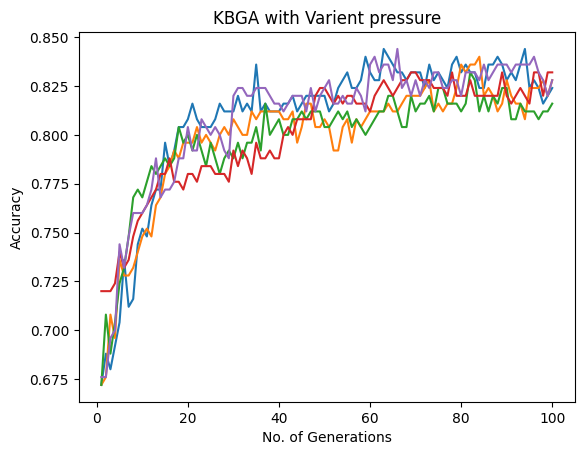

In [14]:
with open(kbga_path+kbga_files[3], 'rb') as gf:
    data = pickle.load(gf)
    x = range(1, 101)
    for n in data:
        y = n[1]    
        plt.plot(x, y)
    plt.title("KBGA with Varient pressure")
    plt.xlabel('No. of Generations')
    plt.ylabel('Accuracy')
    plt.show()

In [15]:
avg_acc_vp = np.array(data[0][1])
for i in data[1:]:
    avg_acc_vp += i[1]
avg_acc_vp = avg_acc_vp / 5

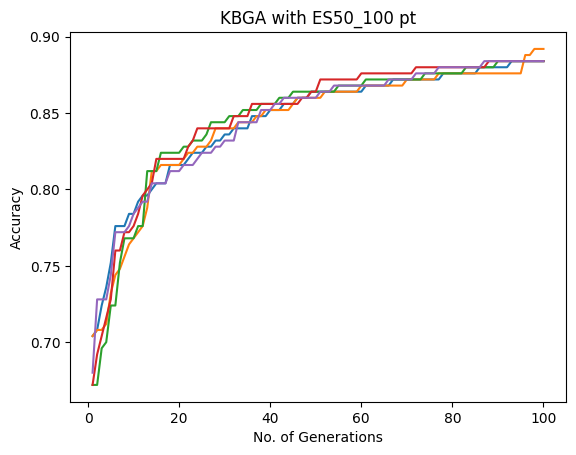

In [16]:
with open(kbga_path+kbga_files[4], 'rb') as gf:
    data = pickle.load(gf)
    x = range(1, 101)
    for n in data:
        y = n[1]    
        plt.plot(x, y)
    plt.title("KBGA with ES50_100 pt")
    plt.xlabel('No. of Generations')
    plt.ylabel('Accuracy')
    plt.show()

avg_acc_es_100_pt = np.array(data[0][1])
for i in data[1:]:
    avg_acc_es_100_pt += i[1]
avg_acc_es_100_pt = avg_acc_es_100_pt / 5

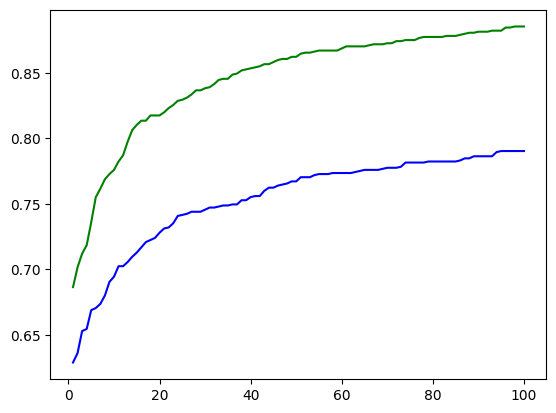

In [17]:
plt.plot(x, avg_acc_ga, color="blue")
plt.plot(x, avg_acc_es_100_pt, color='green')